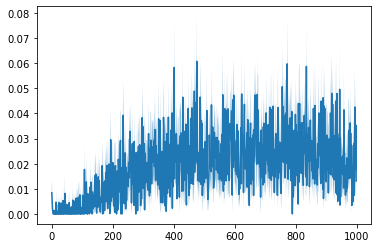

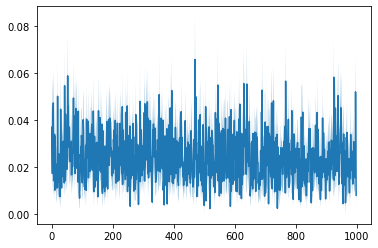

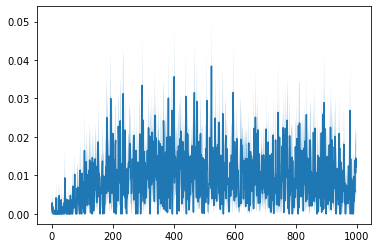

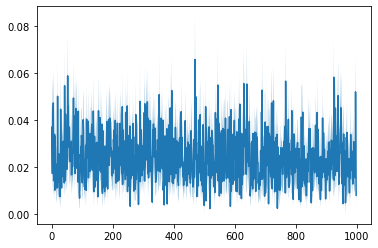

In [34]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import seaborn as sns; sns.set()

%matplotlib inline
ns = [15, 20, 22, 23]
def df(pattern):
    path = next(Path('/home/jovyan/').glob(pattern))
    array = np.load(str(path))
    n, d = array.shape
    indices = np.tile(np.arange(d), n)
    return pd.DataFrame(dict(y=array.flatten(), x=indices, pattern=pattern))


def _plot(*patterns, kind="line", ci="sd",**kwargs):
    data = pd.concat(df(p) for p in patterns)
    sns.relplot(x="x", y="y", hue="pattern", kind=kind, ci=ci, data=data);

    
def moving_average1(a, n=1):
    ret = np.cumsum(a, dtype=float, axis=1)
    ret[:, n:] = ret[:, n:] - ret[:, :-n]
    return ret[:, n - 1:] / n
    
def plot(*patterns):
    for pattern in patterns:
        path = next(Path('/home/jovyan/').glob(pattern))
        array = moving_average1(np.load(str(path)))
        n, d = array.shape
        mean = array.mean(0)
        std = array.std(0)
        ste = std / np.sqrt(n)
        plt.plot(mean)
        plt.fill_between(np.arange(d), mean - ste, mean + ste, alpha=0.5)
    plt.show()
    
#for path in Path('/home/jovyan/').glob(f'*/*/TeacherTrainer_{15}_*/coefficient.npy'):
#    print(path)
for n in ns:
    plot(f'*/*/TeacherTrainer_{n}_*/coefficient.npy')

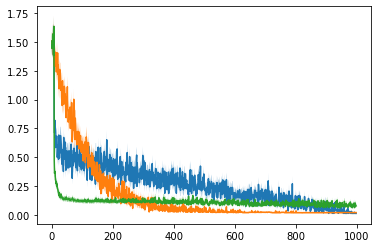

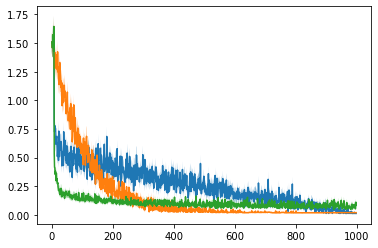

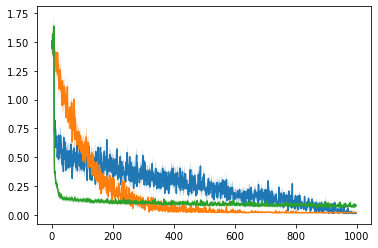

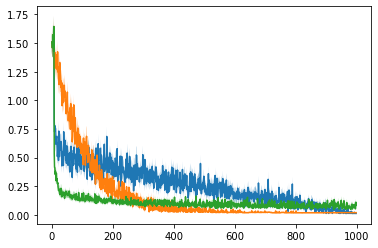

In [35]:
for n in ns:
    plot(f'*/*/TeacherTrainer_{n}_*/linear_regret.npy', f'*/*/TeacherTrainer_{n}_*/exp_regret.npy', f'*/*/TeacherTrainer_{n}_*/regret.npy')

Final Regret:
Cumulative Regret:


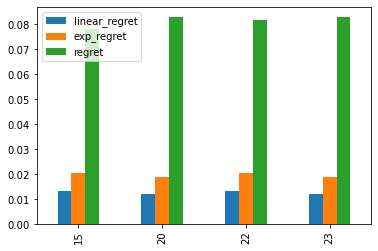

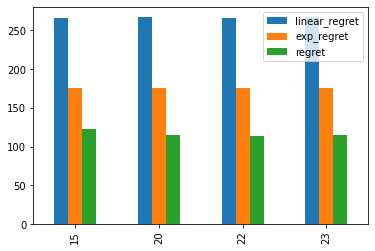

In [40]:
import re
from collections import defaultdict
index = []
cumulative = defaultdict(list)
final = defaultdict(list)

for n in ns:
    index.append(n)
    for key in ['linear_regret', 'exp_regret', 'regret']:
        pattern = f'*/*/TeacherTrainer_{n}_*/{key}.npy'
        path = next(Path('/home/jovyan/').glob(pattern))
        array = np.load(str(path))               
        final[key].append(array[:, -1].mean())
        cumulative[key].append(array.sum(1).mean())

print('Final Regret:')
pd.DataFrame(final, index=index).plot.bar()
print('Cumulative Regret:')
pd.DataFrame(cumulative, index=index).plot.bar()
